# Week 8-9 시계열 RNN

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import os

In [2]:
os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week8')

In [3]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
print('Shape of the dataframe:', df.shape)
df.head()

Shape of the dataframe: (43824, 13)


No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [4]:
# Index creation
df['datetime'] = df[['year', 'month', 'day', 'hour']].\
    apply(lambda row: datetime.datetime(year=row['year'], \
    month=row['month'], day=row['day'],hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  
0 2010-01-01 00:00:00  
1 2010-01-01 01:00:00  
2 2010-01-01 02:00:00  
3 2010-01-01 03:00:00  
4 2010-01-01 04:00:00

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of Air Pressure')

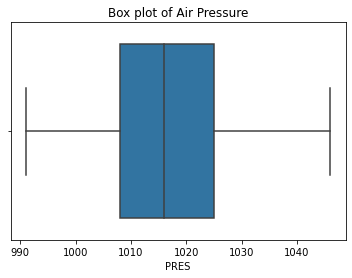

In [5]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')

Text(0, 0.5, 'Air Pressure readings in hPa')

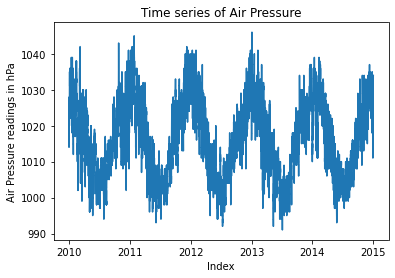

In [6]:
# Time series visualization
g = sns.lineplot(x='datetime',y='PRES',data=df)
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')

In [7]:
# Minmax scaling PRES variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))
df.head()


No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [8]:
"""
Let's start by splitting the dataset into train and test. 
The dataset's time period is from
Jan 1st, 2010 to Dec 31st, 2014. 
The first four years - 2010 to 2013 is used as train and
2014 is kept for test.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_test = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_test.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [9]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [10]:
#First five rows of test
df_test.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35064  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
35065  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
35066  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
35067  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
35068  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_PRES  
35064   0   0 2014-01-01 00:00:00     0.418182  
35065   0   0 2014-01-01 01:00:00     0.400000  
35066   0   0 2014-01-01 02:00:00     0.400000  
35067   0   0 2014-01-01 03:00:00     0.400000  
35068   0   0 2014-01-01 04:00:00     0.381818

In [11]:
#Reset the indices of the validation set
df_test.reset_index(drop=True, inplace=True)
df_test.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  \
0  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   0   
1  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   0   
2  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   0   
3  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   0   
4  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   0   

   Ir            datetime  scaled_PRES  
0   0 2014-01-01 00:00:00     0.418182  
1   0 2014-01-01 01:00:00     0.400000  
2   0 2014-01-01 02:00:00     0.400000  
3   0 2014-01-01 03:00:00     0.400000  
4   0 2014-01-01 04:00:00     0.381818

Text(0, 0.5, 'Scaled Air Pressure readings')

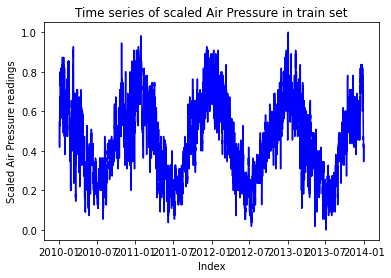

In [12]:
"""
The train and test time series of standardized PRES are also plotted.
"""

g = sns.lineplot(x='datetime',y='scaled_PRES',data=df_train, color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

Text(0, 0.5, 'Scaled Air Pressure readings')

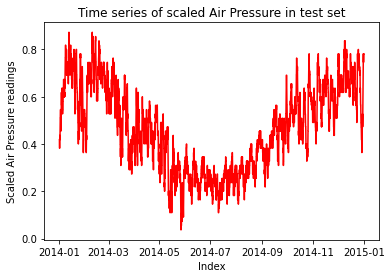

In [13]:
g = sns.lineplot(x='datetime',y='scaled_PRES',data=df_test, color='r')
g.set_title('Time series of scaled Air Pressure in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

In [14]:
# Make dataset to forecast using past 7 days

def makeXy(ts, nb_timesteps):
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [15]:
# Make training set
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)
print(X_train[0])
print(y_train[0])

Shape of train arrays: (35057, 7) (35057,)
[0.54545455 0.52727273 0.50909091 0.50909091 0.49090909 0.47272727
 0.47272727]
0.47272727272727266


In [16]:
# Make test set
X_test, y_test = makeXy(df_test['scaled_PRES'], 7)
print('Shape of Test arrays:', X_test.shape, y_test.shape)
print(X_test[0])
print(y_test[0])


Shape of Test arrays: (8753, 7) (8753,)
[0.41818182 0.4        0.4        0.4        0.38181818 0.38181818
 0.38181818]
0.40000000000000213


In [18]:
# Keras import
from keras.layers import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [19]:
X_train, X_test = X_train.reshape((X_train.shape[0], \
    X_train.shape[1], 1)), X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Shape of 3D arrays:', X_train.shape, X_test.shape)

Shape of 3D arrays: (35057, 7, 1) (8753, 7, 1)


In [20]:
model=Sequential()
model.add(LSTM(64,input_shape=(7,1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [23]:
history=model.fit(X_train, y_train, batch_size=16, epochs=10,shuffle=True)

Epoch 1/10
2192/2192 [==============================] - 11s 4ms/step - loss: 0.0025
Epoch 2/10
2192/2192 [==============================] - 9s 4ms/step - loss: 8.4343e-04
Epoch 3/10
2192/2192 [==============================] - 9s 4ms/step - loss: 4.9276e-04
Epoch 4/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.7224e-04
Epoch 5/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.3293e-04
Epoch 6/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.3274e-04
Epoch 7/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.2129e-04
Epoch 8/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.1485e-04
Epoch 9/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.0761e-04
Epoch 10/10
2192/2192 [==============================] - 9s 4ms/step - loss: 3.0746e-04


In [24]:
preds = model.predict(X_test)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [22]:
# R2 Calculation
from sklearn.metrics import r2_score
r2 = r2_score(df_test['PRES'].loc[7:], pred_PRES)
print('R-squared for the test set:', round(r2,4))

R-squared for the test set: 0.9957


Text(0.5, 0, 'Index')

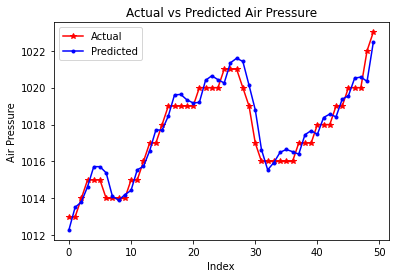

In [25]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.plot(range(50), df_test['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')